# Tutorial

## 1) load a model and run moser / probsat on it

In [5]:

from evaluate_with_given_params import load_model_and_test_moser_single

data_path = #tbf with path of the evaluation dataset e.g. "ml_based_sat_solver_files/data_training_and_test/samples_random_3SAT_evaluation_vary_zero/"

#put the paths of the models you want to evaluate
model_paths = [# "moser" for uniform moser algorithm
               # "schoening" for schoening's algorithm
               # or path of the models eg. "ml_based_sat_solver_files/models/DM_LLL_alt_2_norm_bs_120230803-150920.npy"
                ]
# you can put multiple elements in this list!

N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "schoening"
    else:
        path_save = data_path + model_path + "moser"

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )


SyntaxError: invalid syntax (345580073.py, line 3)

In [6]:

from evaluate_with_given_params import load_model_and_test_probsat_single

data_path = #tbf with path of the evaluation dataset e.g. "ml_based_sat_solver_files/data_training_and_test/samples_random_3SAT_evaluation_vary_zero/"

#put the paths of the models you want to evaluate
model_paths = [
               # path of the models eg. "ml_based_sat_solver_files/models/DM_LLL_alt_2_norm_bs_120230803-150920.npy"
                ]
# you can put multiple elements in this list!

N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    path_save = data_path + model_path + "moser"

    total_array2 = load_model_and_test_probsat_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

SyntaxError: invalid syntax (203125244.py, line 3)

## 2) plot the trajectories from the evaluation above

### 2.1) define helper functions

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#from matplotlib import rc

#font = {'family' : "Times New Roman",
#'size'   : 15}

#rc('font', **font)
#rc('text', usetex=True)

'''
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]
'''

def plot_number_of_steps_single_model(total_steps, n_array, alpha_array, model_details, model_path = False):
    plt.scatter([alpha_array],[total_steps], c = n_array, alpha = 0.2)
    plt.colorbar(label = "n")
    plt.yscale("log")
    plt.ylabel("# steps")
    plt.xlabel(r"$\alpha$")
    if model_details:
        if model_details ==[[]]:
            title = model_path
        else:
            title = r"type = {} + {}, inv_temp = {}, $\alpha$ = {}, $\beta$ = {}, $\gamma$ = {}, mlp_layers = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        plt.title("model: " + title)
    #if model_path:
    #    title = model_path.split("/")[-1]
    #    plt.title("model: " + title)
    plt.show()

def do_evaluation_for_single_model(saved_eval_path):
    model_path, model_details, n_array, alpha_array, energies_array_median, energies_array_mean , total_steps = np.load(saved_eval_path, allow_pickle=True)
    plot_number_of_steps_single_model(total_steps, n_array, alpha_array, model_details,model_path[0])
    
def do_evaluation_multiple_models(saved_eval_path_list, average_alpha = False, plot_save = False):
    fig, ax = plt.subplots(3, 1, figsize=(15, 15))
    def plot_number_of_steps(total_steps, alpha_array, model_details, model_path = False, average_alpha = False):
        if model_details ==[[]]:
            label = model_path
        else:
            label = r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        if average_alpha == False:
            ax[0].scatter([alpha_array],[total_steps], alpha = 0.3, label = label) #model_path.split("/")[-1])
        else:
            x, x_vary = average_alpha
            y = []
            y_std = []
            x_std = []
            for i in x:
                relevant_mask = np.where(abs(i-alpha_array) < x_vary, 1, 0)
                relevant_steps = total_steps*relevant_mask
                relevant_steps = relevant_steps[relevant_steps>0]
                relevant_alpha = alpha_array*relevant_mask
                relevant_alpha = relevant_alpha[relevant_alpha>0]
                #print(i, relevant_alpha)
                y.append(np.mean(relevant_steps))
                y_std.append(np.std(relevant_steps))
                x_std.append(np.std(relevant_alpha))
            #ax[0].plot(x,y, ".--", alpha = 0.8, label = label)
            ax[0].errorbar(x,y, xerr = x_std, yerr = y_std, fmt='--o', alpha = 0.3,label = label, capthick=2)

    def plot_trajectory_mean(energies_array_mean, model_details, model_path):
        if model_details ==[[]]:
            label = model_path
        else:
            label = r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        ax[1].plot(np.arange(1,len(energies_array_mean)+1,1), energies_array_mean, alpha = 0.3, label = label) #model_path.split("/")[-1])  
    def plot_trajectory_solved_instances(total_steps, energies_array_mean, model_details, model_path):
        if model_details ==[[]]:
            label = model_path
        else:
            label = r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        counter_array = []
        for i in range(len(energies_array_mean)-1):
            x = np.sum(np.where(total_steps<=i*np.ones(len(total_steps)), 1, 0)) #np.sum([np.where(total_steps_j<=i, 1, 0) for total_steps_j in total_steps])
            counter_array.append(x/len(total_steps))
        ax[2].plot(np.arange(1,len(energies_array_mean),1), counter_array, alpha = 0.3, label = label) #model_path.split("/")[-1])
        ax[2].plot(np.arange(1,len(energies_array_mean),1), np.ones(len(energies_array_mean)-1), "--", color = "gray")
    for saved_eval_path in saved_eval_path_list:
        model_path, model_details, n_array, alpha_array, energies_array_mean, total_steps = np.load(saved_eval_path, allow_pickle=True)
        plot_number_of_steps(total_steps, alpha_array, model_details, model_path[0], average_alpha=average_alpha)
        plot_trajectory_mean(energies_array_mean, model_details,model_path[0])
        plot_trajectory_solved_instances(total_steps, energies_array_mean, model_details,model_path[0])
    
    ax[0].set_yscale("log")
    ax[0].set_ylabel("# steps")
    ax[0].set_xlabel(r"$\alpha$")
    ax[0].legend(bbox_to_anchor=(1.04, 1), loc="upper left")

    ax[1].set_yscale("log")
    ax[1].set_xscale("log")
    ax[1].set_ylabel("mean # violated clauses / m")
    ax[1].set_xlabel("steps")
    ax[1].legend(bbox_to_anchor=(1.04, 1), loc="upper left")

    ax[2].set_yscale("log")
    ax[2].set_xscale("log")
    ax[2].set_ylabel("# solved instances / # instances")
    ax[2].set_xlabel("steps")
    ax[2].legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    #plt.show()
    fig.tight_layout()
    if plot_save:
        plt.savefig(plot_save + ".png", dpi = 300, format = "png")
    plt.show()


def do_evaluation_multiple_models_paper(saved_eval_path_list, color, average_alpha = False, plot_save = False):
    fig, ax = plt.subplots(3, 1, figsize=(5, 9))
    def plot_number_of_steps(total_steps, alpha_array, model_details, color, model_path = False, average_alpha = False, saved_eval_path = False):
        if model_details ==[[]]:
            label = model_path
            if label == "uniform":
                label = "uniform MT"
            if label == "schoening":
                label = "uniform WalkSAT"
        else:
            if "moser" in saved_eval_path: 
                label = "ml-boosted MT"#r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])

            elif "probsat" in saved_eval_path:
                label = "ml-boosted WalkSAT"
            else:
                label = "not specified"
        #else:
        #    label = "ml-boosted moser"#r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        if average_alpha == False:
            ax[0].scatter([alpha_array],[total_steps], alpha = 0.3, label = label) #model_path.split("/")[-1])
        else:
            x, x_vary = average_alpha
            y = []
            #y_std = []
            #x_std = []
            #y_min = []
            #y_max = []
            for i in x:
                relevant_mask = np.where(abs(i-alpha_array) < x_vary, 1, 0)
                relevant_steps = total_steps*relevant_mask
                relevant_steps = relevant_steps[relevant_steps>0]
                relevant_alpha = alpha_array*relevant_mask
                relevant_alpha = relevant_alpha[relevant_alpha>0]
                #print(i, relevant_alpha)
                y.append(np.mean(relevant_steps))
                #y_std.append(np.std(relevant_steps))
                #x_std.append(np.std(relevant_alpha))
                #y_min.append(np.min(relevant_steps))
                #y_max.append(np.max(relevant_steps))
            ax[0].plot(x,y, ".-", alpha = 0.3, color = color, label = label)
            #ax[0].plot(x,y_min, "--", alpha = 0.1, color = color)
            #ax[0].plot(x, y_max, "--", alpha = 0.1, color = color)
            #ax[0].errorbar(x,y, xerr = x_std, yerr = y_std, fmt='--o', alpha = 0.3,label = label, capthick=6)

            arange = np.arange(np.min(x),np.max(x),0.2)
            ax[0].plot(arange, np.max(y)*np.ones(len(arange)), "--", color = "gray")

    def plot_trajectory_mean(energies_array_mean, model_details, color, model_path, plot_save = False, saved_eval_path = False):
        if model_details ==[[]]:
            label = model_path
            if label == "uniform":
                label = "uniform MT"
            if label == "schoening":
                label = "uniform WalkSAT"
        else:
            if "moser" in saved_eval_path: 
                label = "ml-boosted MT"#r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])

            elif "probsat" in saved_eval_path:
                label = "ml-boosted WalkSAT"
            else:
                label = "not specified"
        #else:
        #    label = "ml-boosted" #r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        ax[1].plot(np.arange(1,len(energies_array_mean)+1,1), energies_array_mean, color = color, alpha = 0.3, label = label) #model_path.split("/")[-1])  
    def plot_trajectory_solved_instances(total_steps, energies_array_mean, model_details, color, model_path, saved_eval_path = False):
        if model_details ==[[]]:
            label = model_path
            if label == "uniform":
                label = "uniform MT"
            if label == "schoening":
                label = "uniform WalkSAT"
        else:
            if "moser" in saved_eval_path: 
                label = "ml-boosted MT"#r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])

            elif "probsat" in saved_eval_path:
                label = "ml-boosted WalkSAT"
            else:
                label = "not specified"
        #else:
        #    label = "ml-boosted" #r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        counter_array = []
        for i in range(len(energies_array_mean)-1):
            x = np.sum(np.where(total_steps<=i*np.ones(len(total_steps)), 1, 0)) #np.sum([np.where(total_steps_j<=i, 1, 0) for total_steps_j in total_steps])
            counter_array.append(x/len(total_steps))
        ax[2].plot(np.arange(1,len(energies_array_mean),1), counter_array, color = color, alpha = 0.3, label = label) #model_path.split("/")[-1])
        ax[2].plot(np.arange(1,len(energies_array_mean),1), np.ones(len(energies_array_mean)-1), "--", color = "gray")
    for i in range(len(saved_eval_path_list)):
        saved_eval_path = saved_eval_path_list[i]
        c = color[i]
        model_path, model_details, n_array, alpha_array, energies_array_mean, energies_array_median, total_steps = np.load(saved_eval_path, allow_pickle=True)
        total_steps_mean = np.mean(total_steps, axis = 1)
        print("total_steps", total_steps.shape)
        print("total_steps_mean", total_steps_mean.shape)
        plot_number_of_steps(total_steps_mean, alpha_array, model_details, c, model_path[0], average_alpha=average_alpha, saved_eval_path = saved_eval_path)
        if len(energies_array_mean)!= 0:
            plot_trajectory_mean(energies_array_mean, model_details,c, model_path = model_path[0], saved_eval_path=saved_eval_path)
            plot_trajectory_solved_instances(total_steps_mean, energies_array_mean, model_details, c, model_path[0], saved_eval_path=saved_eval_path)
    
    ax[0].set_yscale("log")
    ax[0].set_ylabel("# steps")
    ax[0].set_xlabel(r"$\alpha$")
    ax[0].legend()#bbox_to_anchor=(1.04, 1), loc="upper left")

    ax[1].set_yscale("log")
    ax[1].set_xscale("log")
    ax[1].set_ylabel("# violated clauses / m")
    ax[1].set_xlabel("steps")
    ax[1].legend()#bbox_to_anchor=(1.04, 1), loc="upper left")

    #ax[2].set_yscale("log")
    ax[2].set_xscale("log")
    ax[2].set_ylabel("# solved instances / # instances")
    ax[2].set_xlabel("steps")
    ax[2].legend() #bbox_to_anchor=(1.04, 1), loc="upper left")
    #plt.show()
    fig.tight_layout()
    if plot_save:
        plt.savefig(plot_save + ".png", dpi = 300, format = "png")
    plt.show()

def do_evaluation_multiple_models_overview(saved_eval_path_list, color, average_alpha = False, plot_save = False):
    fig, ax = plt.subplots(3, 1, figsize=(5, 9))
    def plot_number_of_steps(total_steps, alpha_array, model_details, color, model_path = False, average_alpha = False, saved_eval_path = False):
        if model_details ==[[]]:
            label = model_path
            if label == "uniform":
                label = "uniform MT"
            if label == "schoening":
                label = "uniform WalkSAT"
        else:
            label = r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        #else:
        #    label = "ml-boosted moser"#r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        if average_alpha == False:
            ax[0].scatter([alpha_array],[total_steps], alpha = 0.3, label = label) #model_path.split("/")[-1])
        else:
            x, x_vary = average_alpha
            y = []
            #y_std = []
            #x_std = []
            #y_min = []
            #y_max = []
            for i in x:
                relevant_mask = np.where(abs(i-alpha_array) < x_vary, 1, 0)
                relevant_steps = total_steps*relevant_mask
                relevant_steps = relevant_steps[relevant_steps>0]
                relevant_alpha = alpha_array*relevant_mask
                relevant_alpha = relevant_alpha[relevant_alpha>0]
                #print(i, relevant_alpha)
                y.append(np.mean(relevant_steps))
                #y_std.append(np.std(relevant_steps))
                #x_std.append(np.std(relevant_alpha))
                #y_min.append(np.min(relevant_steps))
                #y_max.append(np.max(relevant_steps))
            ax[0].plot(x,y, ".-", alpha = 0.3, color = color, label = label)
            #ax[0].plot(x,y_min, "--", alpha = 0.1, color = color)
            #ax[0].plot(x, y_max, "--", alpha = 0.1, color = color)
            #ax[0].errorbar(x,y, xerr = x_std, yerr = y_std, fmt='--o', alpha = 0.3,label = label, capthick=6)

            arange = np.arange(np.min(x),np.max(x),0.2)
            ax[0].plot(arange, np.max(y)*np.ones(len(arange)), "--", color = "gray")

    def plot_trajectory_mean(energies_array_mean, model_details, color, model_path, plot_save = False, saved_eval_path = False):
        if model_details ==[[]]:
            label = model_path
            if label == "uniform":
                label = "uniform MT"
            if label == "schoening":
                label = "uniform WalkSAT"
        else:
            label = r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        #else:
        #    label = "ml-boosted" #r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        ax[1].plot(np.arange(1,len(energies_array_mean)+1,1), energies_array_mean, color = color, alpha = 0.3, label = label) #model_path.split("/")[-1])  
    def plot_trajectory_solved_instances(total_steps, energies_array_mean, model_details, color, model_path, saved_eval_path = False):
        if model_details ==[[]]:
            label = model_path
            if label == "uniform":
                label = "uniform MT"
        else:
            label = r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        #else:
        #    label = "ml-boosted" #r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        counter_array = []
        for i in range(len(energies_array_mean)-1):
            x = np.sum(np.where(total_steps<=i*np.ones(len(total_steps)), 1, 0)) #np.sum([np.where(total_steps_j<=i, 1, 0) for total_steps_j in total_steps])
            counter_array.append(x/len(total_steps))
        ax[2].plot(np.arange(1,len(energies_array_mean),1), counter_array, color = color, alpha = 0.3, label = label) #model_path.split("/")[-1])
        ax[2].plot(np.arange(1,len(energies_array_mean),1), np.ones(len(energies_array_mean)-1), "--", color = "gray")
    for i in range(len(saved_eval_path_list)):
        saved_eval_path = saved_eval_path_list[i]
        c = color[i]
        model_path, model_details, n_array, alpha_array, energies_array_mean, energies_array_median, total_steps = np.load(saved_eval_path, allow_pickle=True)
        total_steps_mean = np.mean(total_steps, axis = 1)
        print("total_steps", total_steps.shape)
        print("total_steps_mean", total_steps_mean.shape)
        plot_number_of_steps(total_steps_mean, alpha_array, model_details, c, model_path[0], average_alpha=average_alpha, saved_eval_path = saved_eval_path)
        if len(energies_array_mean)!= 0:
            plot_trajectory_mean(energies_array_mean, model_details,c, model_path = model_path[0], saved_eval_path=saved_eval_path)
            plot_trajectory_solved_instances(total_steps_mean, energies_array_mean, model_details, c, model_path[0], saved_eval_path=saved_eval_path)
    
    ax[0].set_yscale("log")
    ax[0].set_ylabel("# steps")
    ax[0].set_xlabel(r"$\alpha$")
    ax[0].legend(bbox_to_anchor=(1.04, 1), loc="upper left")#bbox_to_anchor=(1.04, 1), loc="upper left")

    ax[1].set_yscale("log")
    ax[1].set_xscale("log")
    ax[1].set_ylabel("# violated clauses / m")
    ax[1].set_xlabel("steps")
    ax[1].legend(bbox_to_anchor=(1.04, 1), loc="upper left")#bbox_to_anchor=(1.04, 1), loc="upper left")

    #ax[2].set_yscale("log")
    ax[2].set_xscale("log")
    ax[2].set_ylabel("# solved instances / # instances")
    ax[2].set_xlabel("steps")
    ax[2].legend(bbox_to_anchor=(1.04, 1), loc="upper left") #bbox_to_anchor=(1.04, 1), loc="upper left")
    #plt.show()
    fig.tight_layout()
    if plot_save:
        plt.savefig(plot_save + ".png", dpi = 300, format = "png")
    plt.show()



def benchmark_two_models(saved_eval_path1, saved_eval_path2, color_coded = "n"):
    model_path1, model_details1, n_array1, alpha_array1, _ , total_steps1 = np.load(saved_eval_path1, allow_pickle=True)
    model_path2,model_details2, n_array2, alpha_array2, _ , total_steps2 = np.load(saved_eval_path2, allow_pickle=True)
    if model_details1 == [[]]:
        title1 = model_path1[0]
    else:
        title1 = r"{} + {}, {}, ({},{},{}), {}".format(model_details1[0][5], model_details1[0][6],model_details1[0][0], model_details1[0][1], model_details1[0][2], model_details1[0][3], model_details1[0][4])
    if model_details1 == [[]]:
        title2 = model_path2[0]
    else:
        title2 = r"{} + {}, {}, ({},{},{}), {}".format(model_details2[0][5], model_details2[0][6],model_details2[0][0], model_details2[0][1], model_details2[0][2], model_details2[0][3], model_details2[0][4])
    #title1 = r"type = {} + {}, inv_temp = {}, $\alpha$ = {}, $\beta$ = {}, $\gamma$ = {}, mlp_layers = {}".format(model_details1[0][5], model_details1[0][6],model_details1[0][0], model_details1[0][1], model_details1[0][2], model_details1[0][3], model_details1[0][4]) #model_path1[0].split("/")[-1]
    #title2 = r"type = {} + {}, inv_temp = {}, $\alpha$ = {}, $\beta$ = {}, $\gamma$ = {}, mlp_layers = {}".format(model_details2[0][5], model_details2[0][6],model_details2[0][0], model_details2[0][1], model_details2[0][2], model_details2[0][3], model_details2[0][4]) #model_path2[0].split("/")[-1]
    x = np.arange(np.min([np.min(total_steps1), np.min(total_steps2)]), np.max([np.max(total_steps1), np.max(total_steps2)]), 100)
    plt.plot(x, x, label = "f(x) = x")
    if color_coded == "n":
        plt.scatter(total_steps1,total_steps2, c = n_array1, alpha = 0.2)
        plt.colorbar(label = "n")
    if color_coded == "alpha":
        plt.scatter(total_steps1,total_steps2, c = alpha_array1, alpha = 0.2)
        plt.colorbar(label = r"$\alpha$")
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel("# steps of " + title2)
    plt.xlabel("# steps of " + title1)
    plt.legend()
    plt.title(title1 + " vs. " + title2)
    plt.show()


def do_evaluation_multiple_models_paper2(saved_eval_path_list, color, average_alpha = False, plot_save = False, maxsteps = 1000000, mode = "moser"):
    fig, ax = plt.subplots(3, 2, figsize=(9,12))
    def plot_number_of_steps(total_steps, alpha_array, model_details, color, model_path = False, average_alpha = False, maxsteps = maxsteps, saved_eval_path = False):
        if model_details ==[[]]:
            label = model_path
            if label == "uniform":
                label = "uniform MT"
            if label == "schoening":
                label = "uniform WalkSAT"
        else:
            if "moser" in saved_eval_path: 
                label = "ml-boosted MT"#r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
            elif "probsat" in saved_eval_path:
                label = "ml-boosted WalkSAT"
            else:
                label = "not specified"
        if average_alpha == False:
            ax[0,0].scatter([alpha_array],[total_steps], alpha = 0.3, label = label) #model_path.split("/")[-1])
        else:
            total_steps_mean = np.mean(total_steps, axis = 1)
            total_steps_median = np.median(total_steps, axis = 1)
            x, x_vary = average_alpha
            y_mean = []
            y_median = []
            y_percentage = []
            #y_std = []
            #x_std = []
            #y_min = []
            #y_max = []
            for i in x:
                relevant_mask = np.where(abs(i-alpha_array) < x_vary, 1, 0)
                relevant_steps_mean = total_steps_mean*relevant_mask
                relevant_steps_mean = relevant_steps_mean[relevant_steps_mean>0]
                relevant_steps_median = total_steps_median*relevant_mask
                relevant_steps_median = relevant_steps_median[relevant_steps_median>0]

                relevant_alpha = alpha_array*relevant_mask
                relevant_alpha = relevant_alpha[relevant_alpha>0]
                #print(i, relevant_alpha)
                y_mean.append(np.mean(relevant_steps_mean))
                y_median.append(np.median(relevant_steps_median))
                
                #y_std.append(np.std(relevant_steps))
                #x_std.append(np.std(relevant_alpha))
                #y_min.append(np.min(relevant_steps))
                #y_max.append(np.max(relevant_steps))
                y_percentage.append(np.sum(np.where(relevant_steps_mean<maxsteps - 1, 1, 0))/len(relevant_steps_mean))
            ax[0,0].plot(x,y_mean, ".-", alpha = 0.3, color = color, label = label)
            ax[1,0].plot(x,y_median, ".-", alpha = 0.3, color = color, label = label)
            ax[2,0].plot(x,y_percentage, ".-", alpha = 0.3, color = color, label = label)
            #ax[0].plot(x,y_min, "--", alpha = 0.1, color = color)
            #ax[0].plot(x, y_max, "--", alpha = 0.1, color = color)
            #ax[0].errorbar(x,y, xerr = x_std, yerr = y_std, fmt='--o', alpha = 0.3,label = label, capthick=6)

            arange = np.arange(np.min(x),np.max(x),0.2)
            ax[0,0].plot(arange, maxsteps*np.ones(len(arange)), "--", color = "gray")
            ax[1,0].plot(arange, maxsteps*np.ones(len(arange)), "--", color = "gray")
            ax[2,0].plot(arange, np.ones(len(arange)), "--", color = "gray")

    def plot_trajectory_mean(energies_array_mean, model_details, color, model_path, plot_save = False, saved_eval_path = False):
        if model_details ==[[]]:
            label = model_path
            if label == "schoening":
                label = "uniform WalkSAT"
            if label == "uniform":
                label = "uniform MT"
        else:
            if "moser" in saved_eval_path: 
                label = "ml-boosted MT"#r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
            if "probsat" in saved_eval_path:
                label = "ml-boosted WalkSAT"
            #label = "ml-boosted moser" #r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        ax[1,1].plot(np.arange(1,len(energies_array_mean)+1,1), energies_array_mean, color = color, alpha = 0.3, label = label) #model_path.split("/")[-1])  
    def plot_trajectory_solved_instances(total_steps, energies_array_mean, model_details, color, model_path, saved_eval_path = False):
        total_steps_mean = np.mean(total_steps, axis = 1)
        if model_details ==[[]]:
            label = model_path
            if label == "schoening":
                label = "uniform WalkSAT"
            if label == "uniform":
                label = "uniform MT"
        else:
            if "moser" in saved_eval_path: 
                label = "ml-boosted MT"#r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])

            if "probsat" in saved_eval_path:
                label = "ml-boosted WalkSAT"
            # label = "ml-boosted moser" #r"{} + {} with $\beta$ = {}, loss = ({},{},{}), mlp = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        counter_array = []
        for i in range(len(energies_array_mean)-1):
            x = np.sum(np.where(total_steps_mean<=i*np.ones(len(total_steps_mean)), 1, 0)) #np.sum([np.where(total_steps_j<=i, 1, 0) for total_steps_j in total_steps])
            counter_array.append(x/len(total_steps_mean))
        ax[2,1].plot(np.arange(1,len(energies_array_mean),1), counter_array, color = color, alpha = 0.3, label = label) #model_path.split("/")[-1])
        ax[2,1].plot(np.arange(1,len(energies_array_mean),1), np.ones(len(energies_array_mean)-1), "--", color = "gray")
    steps = [[],[]]
    for i in range(len(saved_eval_path_list)):
        saved_eval_path = saved_eval_path_list[i]
        c = color[i]
        model_path, model_details, n_array, alpha_array, energies_array_mean, energies_array_median, total_steps = np.load(saved_eval_path, allow_pickle=True)
        plot_number_of_steps(total_steps, alpha_array, model_details, c, model_path[0], average_alpha=average_alpha, saved_eval_path=saved_eval_path)
        if len(energies_array_mean) != 0:
            plot_trajectory_mean(energies_array_mean, model_details,c, model_path = model_path[0], saved_eval_path=saved_eval_path)
            plot_trajectory_solved_instances(total_steps, energies_array_mean, model_details, c, model_path[0], saved_eval_path=saved_eval_path)
        total_steps_mean = np.mean(total_steps, axis = 1)
        if mode == "moser":
            if model_details ==[[]] and model_path[0] == "uniform":
                steps[0].append(total_steps_mean)
            if model_details != [[]] and "moser" in saved_eval_path:
                steps[1].append(total_steps_mean)
                alpha_array_model = alpha_array

        if mode == "schoening":
            if model_details ==[[]] and model_path[0] == "schoening":
                steps[0].append(total_steps_mean)
            if model_details != [[]] and "probsat" in saved_eval_path:
                steps[1].append(total_steps_mean)
                alpha_array_model = alpha_array
    print(np.shape(steps[0]))
    print(np.shape(steps[1]))
    
    im = ax[0,1].scatter(steps[0], steps[1], alpha = 0.2, c = alpha_array_model)
    ax[0,1].set_title("d)", loc='left')
    ax[0,1].set_ylim([1,int(maxsteps*3)])
    ax[0,1].set_xlim([1,int(maxsteps*3)])
    ax[0,1].plot(np.arange(1,maxsteps,1000),np.arange(1,maxsteps,1000), "--", color = "gray")
    ax[0,1].set_yscale("log")
    ax[0,1].set_xscale("log")
    if mode == "moser":
        ax[0,1].set_xlabel("# steps taken by uniform MT")
        ax[0,1].set_ylabel("# steps taken by ml-boosted MT")
    if mode == "schoening":
        ax[0,1].set_xlabel("# steps taken by WalkSAT")
        ax[0,1].set_ylabel("# steps taken by ml-boosted WalkSAT")

    ax[0,0].set_title("a)", loc='left')
    ax[0,0].set_yscale("log")
    ax[0,0].set_ylabel("mean # steps")
    ax[0,0].set_xlabel(r"$\alpha$")
    ax[0,0].legend()#bbox_to_anchor=(1.04, 1), loc="upper left")

    ax[1,0].set_title("b)", loc='left')
    ax[1,0].set_yscale("log")
    ax[1,0].set_ylabel("median # steps")
    ax[1,0].set_xlabel(r"$\alpha$")
    ax[1,0].legend()#bbox_to_anchor=(1.04, 1), loc="upper left")

    ax[2,0].set_title("c)", loc='left') 
    #ax[2,0].set_yscale("log")
    ax[2,0].set_ylabel("# solved instances / # instances")
    ax[2,0].set_xlabel(r"$\alpha$")
    ax[2,0].legend()#bbox_to_anchor=(1.04, 1), loc="upper left")

    ax[1,1].set_title("e)", loc='left')
    ax[1,1].set_yscale("log")
    ax[1,1].set_xscale("log")
    ax[1,1].set_ylabel("mean # violated clauses / m")
    ax[1,1].set_xlabel("# steps")
    ax[1,1].legend()#bbox_to_anchor=(1.04, 1), loc="upper left")

    ax[2,1].set_title("f)", loc='left')
    #ax[2,1].set_yscale("log")
    ax[2,1].set_xscale("log")
    ax[2,1].set_ylabel("# solved instances / # instances")
    ax[2,1].set_xlabel("# steps")
    ax[2,1].legend() #bbox_to_anchor=(1.04, 1), loc="upper left")
    #plt.show()
    fig.colorbar(im, label = r"$\alpha$", ax = ax[0,1])
    fig.tight_layout()
    if plot_save:
        plt.savefig(plot_save + ".png", dpi = 300, format = "png")
    plt.show()


def do_evaluation_multiple_models_DOI(saved_eval_path_list, color, average_alpha = False, plot_save = False, maxsteps = 1000000):
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    steps = [[],[]]
    for i in range(len(saved_eval_path_list)):
        saved_eval_path = saved_eval_path_list[i]
        model_path, model_details, n_array, alpha_array, energies_array_mean, total_steps = np.load(saved_eval_path, allow_pickle=True)
        if model_details ==[[]] and model_path[0] == "uniform":
            steps[0].extend(total_steps)
        if model_details != [[]]:
            steps[1].extend(total_steps)
            alpha_array_model = alpha_array
    
    ax.scatter(alpha_array_model, np.array(steps[0])/np.array(steps[1]), c = "teal", alpha = 0.2)
    ax.set_yscale("log")
    #ax.set_xscale("log")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("degree of improvement")

    fig.tight_layout()
    if plot_save:
        plt.savefig(plot_save + ".png", dpi = 300, format = "png")
    plt.show()
    
def do_evaluation_multiple_models_paper_legend(saved_eval_path_list, color, average_alpha = False, plot_save = False, legend = False):
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    def plot_number_of_steps(total_steps, alpha_array, model_details, color, model_path = False, average_alpha = False, saved_eval_path = False, legend = False):
        label = legend
        if average_alpha == False:
            ax[0].scatter([alpha_array],[total_steps], alpha = 0.3, label = label) #model_path.split("/")[-1])
        else:
            x, x_vary = average_alpha
            y = []
            #y_std = []
            #x_std = []
            #y_min = []
            #y_max = []
            for i in x:
                relevant_mask = np.where(abs(i-alpha_array) < x_vary, 1, 0)
                relevant_steps = total_steps*relevant_mask
                relevant_steps = relevant_steps[relevant_steps>0]
                relevant_alpha = alpha_array*relevant_mask
                relevant_alpha = relevant_alpha[relevant_alpha>0]
                #print(i, relevant_alpha)
                y.append(np.mean(relevant_steps))
                #y_std.append(np.std(relevant_steps))
                #x_std.append(np.std(relevant_alpha))
                #y_min.append(np.min(relevant_steps))
                #y_max.append(np.max(relevant_steps))
            ax[0].plot(x,y, ".-", alpha = 0.3, color = color, label = label)
            #ax[0].plot(x,y_min, "--", alpha = 0.1, color = color)
            #ax[0].plot(x, y_max, "--", alpha = 0.1, color = color)
            #ax[0].errorbar(x,y, xerr = x_std, yerr = y_std, fmt='--o', alpha = 0.3,label = label, capthick=6)

            arange = np.arange(np.min(x),np.max(x),0.2)
            ax[0].plot(arange, np.max(y)*np.ones(len(arange)), "--", color = "gray")

    def plot_trajectory_mean(energies_array_mean, model_details, color, model_path, plot_save = False, saved_eval_path = False, legend = False):
        label = legend
        ax[1].plot(np.arange(1,len(energies_array_mean)+1,1), energies_array_mean, color = color, alpha = 0.3, label = label) #model_path.split("/")[-1])  
    def plot_trajectory_solved_instances(total_steps, energies_array_mean, model_details, color, model_path, saved_eval_path = False, legend = False):
        label = legend
        counter_array = []
        for i in range(len(energies_array_mean)-1):
            x = np.sum(np.where(total_steps<=i*np.ones(len(total_steps)), 1, 0)) #np.sum([np.where(total_steps_j<=i, 1, 0) for total_steps_j in total_steps])
            counter_array.append(x/len(total_steps))
        ax[2].plot(np.arange(1,len(energies_array_mean),1), counter_array, color = color, alpha = 0.3, label = label) #model_path.split("/")[-1])
        ax[2].plot(np.arange(1,len(energies_array_mean),1), np.ones(len(energies_array_mean)-1), "--", color = "gray")
    for i in range(len(saved_eval_path_list)):
        saved_eval_path = saved_eval_path_list[i]
        c = color[i]
        l = legend[i]
        model_path, model_details, n_array, alpha_array, energies_array_mean, energies_array_median, total_steps = np.load(saved_eval_path, allow_pickle=True)
        total_steps_mean = np.mean(total_steps, axis = 1)
        print("total_steps", total_steps.shape)
        print("total_steps_mean", total_steps_mean.shape)
        plot_number_of_steps(total_steps_mean, alpha_array, model_details, c, model_path[0], average_alpha=average_alpha, saved_eval_path = saved_eval_path, legend=l)
        if len(energies_array_mean)!= 0:
            plot_trajectory_mean(energies_array_mean, model_details,c, model_path = model_path[0], saved_eval_path=saved_eval_path, legend = l)
            plot_trajectory_solved_instances(total_steps_mean, energies_array_mean, model_details, c, model_path[0], saved_eval_path=saved_eval_path, legend = l)
    
    ax[0].set_yscale("log")
    ax[0].set_ylabel("# steps")
    ax[0].set_xlabel(r"$\alpha$")
    #ax[0].legend()#bbox_to_anchor=(1.04, 1), loc="upper left")

    ax[1].set_yscale("log")
    ax[1].set_xscale("log")
    ax[1].set_ylabel("# violated clauses / m")
    ax[1].set_xlabel("steps")
    #ax[1].legend()#bbox_to_anchor=(1.04, 1), loc="upper left")

    #ax[2].set_yscale("log")
    ax[2].set_xscale("log")
    ax[2].set_ylabel("# solved instances / # instances")
    ax[2].set_xlabel("steps")
    #ax[2].legend(bbox_to_anchor=(1.04, 1), loc="lower center")
    #plt.show()
    #handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center')
    lines_labels = [ax[2].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    lgd = fig.legend(lines, labels,bbox_to_anchor = (0.5, -0.02), loc='upper center')
    fig.tight_layout()
    if plot_save:
        plt.savefig(plot_save + ".png", dpi = 300, format = "png", bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

### 2.2) get an overview

total_steps (2052, 5)
total_steps_mean (2052,)
total_steps (2052, 5)
total_steps_mean (2052,)
total_steps (2052, 5)
total_steps_mean (2052,)
total_steps (2052, 5)
total_steps_mean (2052,)


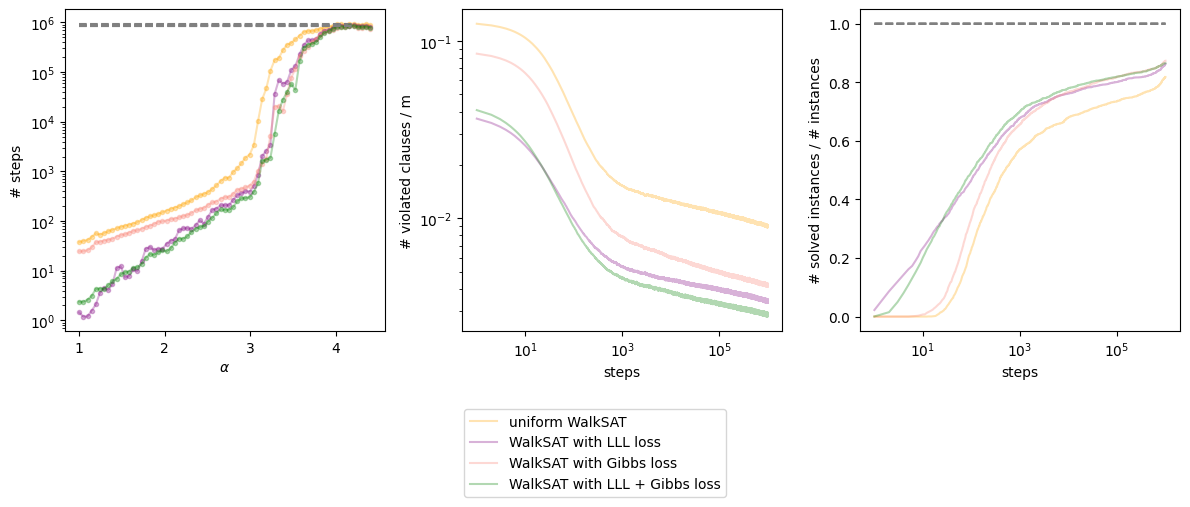

In [2]:
saved_eval_path_list=  ["/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/schoening.npy",
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/LLL_alt_2_norm_bs_120230803-142954probsat.npy",
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/DM_2_norm_bs_120230803-125306probsat.npy",
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/DM_LLL_alt_2_norm_bs_120230803-150920probsat.npy",
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/LLL_2_norm_bs_120230803-131052probsat.npy",
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/DM_LLL_2_norm_bs_120230803-134950probsat.npy",
                        
                        ]
color = ["orange","purple", "salmon", "green"]


legend = ["uniform WalkSAT", "WalkSAT with LLL loss", "WalkSAT with Gibbs loss", "WalkSAT with LLL + Gibbs loss",]
x = np.linspace(1, 4.4, 71)
x_vary = 0.05
plot_save = plot_save = "/Users/p403830/Downloads/ml_based_sat_solver_files/plots/WalkSAT_loss_function_comparison"
do_evaluation_multiple_models_paper_legend(saved_eval_path_list, color, average_alpha = (x, x_vary), plot_save = plot_save, legend=legend)

total_steps (2052, 5)
total_steps_mean (2052,)
total_steps (2052, 5)
total_steps_mean (2052,)
total_steps (2052, 5)
total_steps_mean (2052,)
total_steps (2052, 5)
total_steps_mean (2052,)


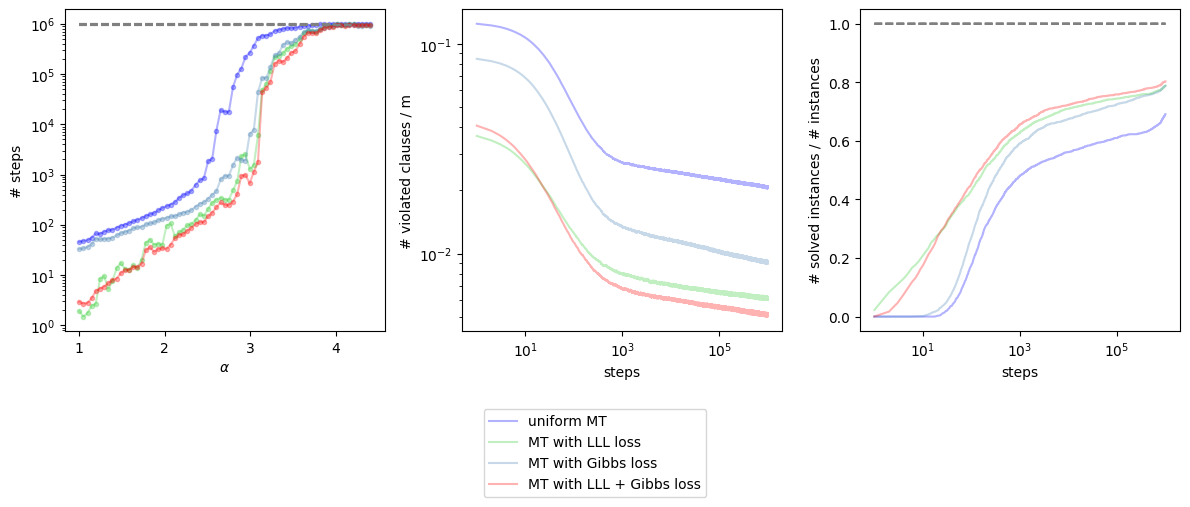

In [3]:

saved_eval_path_list=  ["/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/moser/uniformmoser.npy", 
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/moser/LLL_alt_2_norm_bs_120230803-142954moser.npy",
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/moser/DM_2_norm_bs_120230803-125306moser.npy",
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/moser/DM_LLL_alt_2_norm_bs_120230803-150920moser.npy",
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/LLL_2_norm_bs_120230803-131052probsat.npy",
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/DM_LLL_2_norm_bs_120230803-134950probsat.npy",
                        
                        ]
color = ["blue","limegreen", "steelblue", "red"]

legend = ["uniform MT", "MT with LLL loss", "MT with Gibbs loss", "MT with LLL + Gibbs loss",]
x = np.linspace(1, 4.4, 71)
x_vary = 0.05
plot_save = "/Users/p403830/Downloads/ml_based_sat_solver_files/plots/MT_loss_function_comparison"
do_evaluation_multiple_models_paper_legend(saved_eval_path_list, color, average_alpha = (x, x_vary), plot_save = plot_save, legend=legend)

### 2.3) initialization vs. resampling + initialization

total_steps (2052, 5)
total_steps_mean (2052,)
total_steps (2052, 5)
total_steps_mean (2052,)
total_steps (2052, 5)
total_steps_mean (2052,)


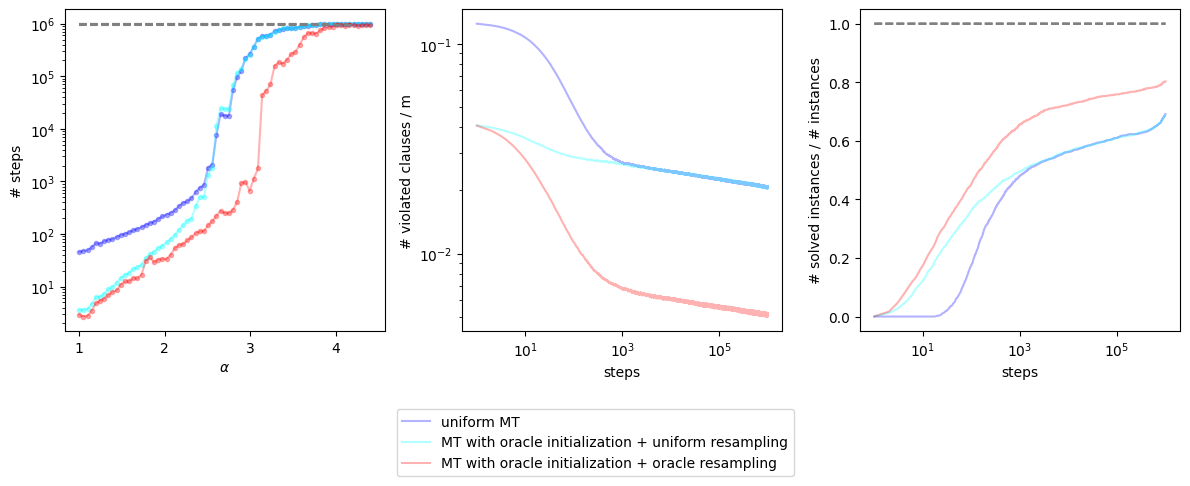

In [4]:
saved_eval_path_list=  ["/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/moser/uniformmoser.npy",
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/moser/initialize_DM_LLL_alt_2_norm_bs_120230803-150920_and_resample_uniform_moser.npy",
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/moser/DM_LLL_alt_2_norm_bs_120230803-150920moser.npy",
                        ]
color = ["blue","cyan", "red"]


legend = ["uniform MT", "MT with oracle initialization + uniform resampling", "MT with oracle initialization + oracle resampling"]
x = np.linspace(1, 4.4, 71)
x_vary = 0.05
plot_save = plot_save = "/Users/p403830/Downloads/ml_based_sat_solver_files/plots/Moser_oracle_vs_uniform"
do_evaluation_multiple_models_paper_legend(saved_eval_path_list, color, average_alpha = (x, x_vary), plot_save = plot_save, legend=legend)

total_steps (2052, 5)
total_steps_mean (2052,)
total_steps (2052, 5)
total_steps_mean (2052,)
total_steps (2052, 5)
total_steps_mean (2052,)


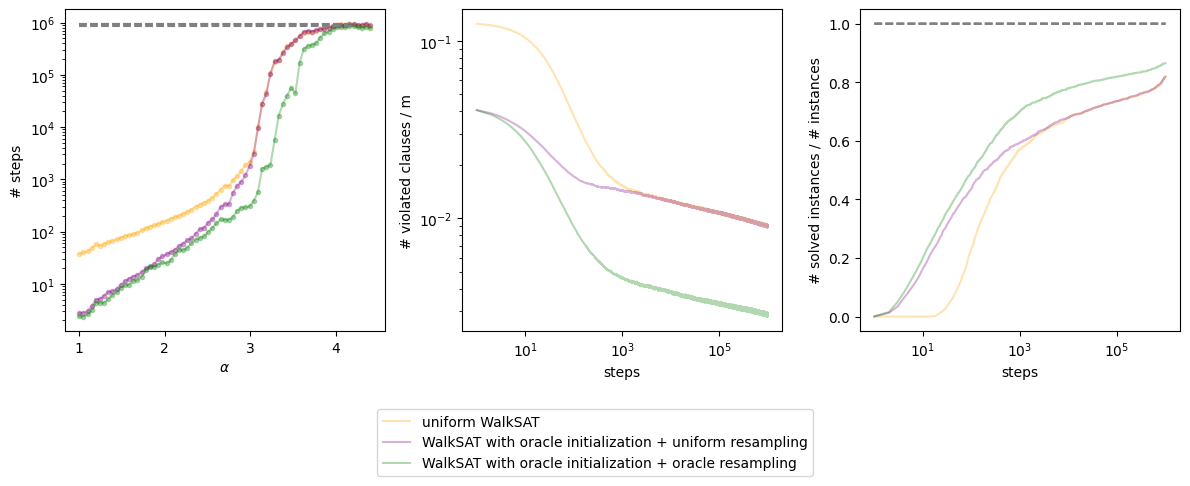

In [5]:
saved_eval_path_list=  ["/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/schoening.npy",
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/initialize_DM_LLL_alt_2_norm_bs_120230803-150920_and_resample_uniform_walksat.npy",
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/DM_LLL_alt_2_norm_bs_120230803-150920probsat.npy",
                        ]
color = ["orange","purple", "green"]


legend = ["uniform WalkSAT", "WalkSAT with oracle initialization + uniform resampling", "WalkSAT with oracle initialization + oracle resampling"]
x = np.linspace(1, 4.4, 71)
x_vary = 0.05
plot_save = plot_save = "/Users/p403830/Downloads/ml_based_sat_solver_files/plots/WalkSAT_oracle_vs_uniform"
do_evaluation_multiple_models_paper_legend(saved_eval_path_list, color, average_alpha = (x, x_vary), plot_save = plot_save, legend=legend)

### 2.4) detailed comparison

(1, 2052)
(1, 2052)


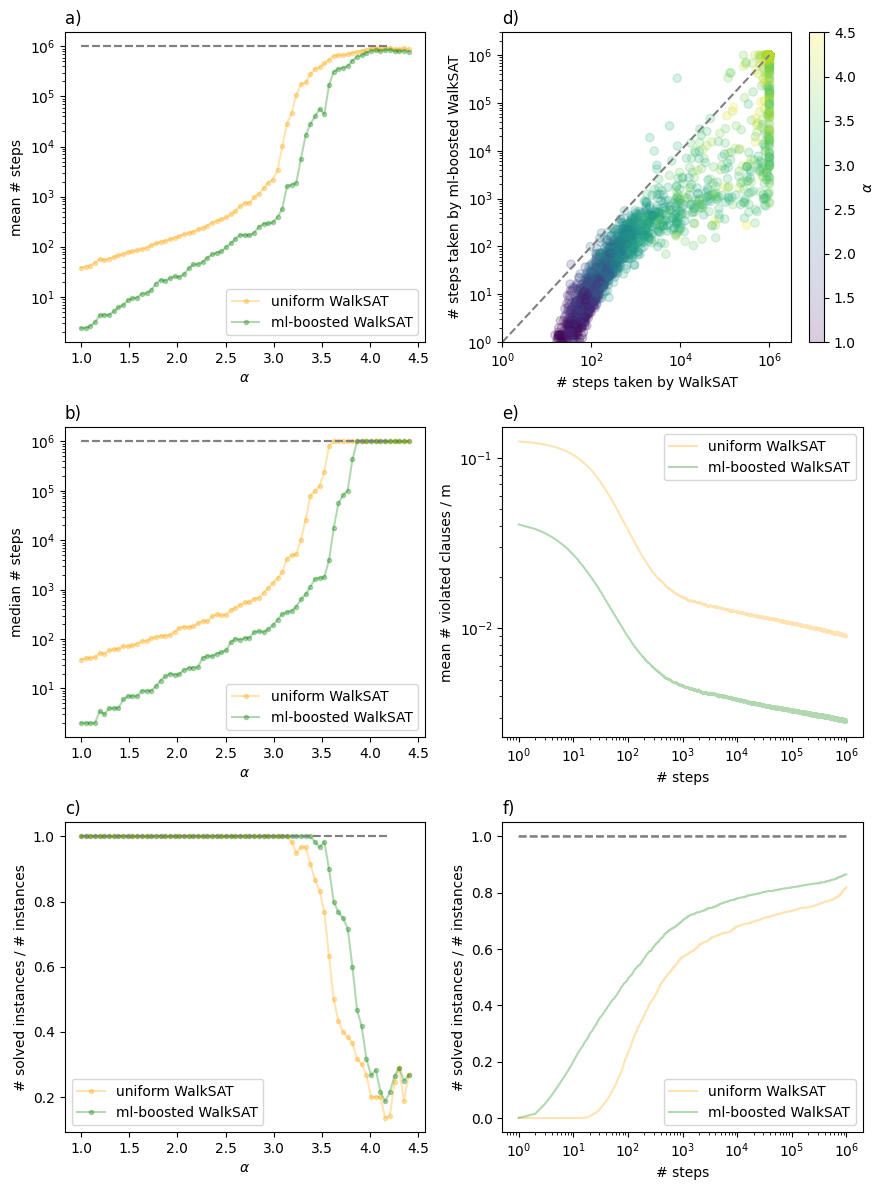

In [9]:
saved_eval_path_list=  ["/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/schoening.npy", 
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/LLL_alt_2_norm_bs_120230803-142954probsat.npy",
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/DM_2_norm_bs_120230803-125306probsat.npy",
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/DM_LLL_alt_2_norm_bs_120230803-150920probsat.npy",
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/LLL_2_norm_bs_120230803-131052probsat.npy",
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/DM_LLL_2_norm_bs_120230803-134950probsat.npy",
                        ]
color = ["orange", "green"]
x = np.linspace(1, 4.4, 71)
x_vary = 0.05
plot_save = "/Users/p403830/Downloads/ml_based_sat_solver_files/plots/WalkSAT_detailed"
do_evaluation_multiple_models_paper2(saved_eval_path_list, color, average_alpha = (x,x_vary), plot_save = plot_save, mode = "schoening")

In [10]:
saved_eval_path_list=  ["/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/moser/uniformmoser.npy",
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/moser/LLL_alt_2_norm_bs_120230803-142954moser.npy",
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/moser/DM_2_norm_bs_120230803-125306moser.npy",
                        "/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/moser/DM_LLL_alt_2_norm_bs_120230803-150920moser.npy",
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/LLL_2_norm_bs_120230803-131052probsat.npy",
                        #"/Users/p403830/Downloads/ml_based_sat_solver_files/trajectories/probsat/DM_LLL_2_norm_bs_120230803-134950probsat.npy",
                        
                        ]
color = ["blue", "red"]
x = np.linspace(1, 4.4, 71)
x_vary = 0.05
plot_save = "/Users/p403830/Downloads/ml_based_sat_solver_files/plots/Moser_detailed"
do_evaluation_multiple_models_paper2(saved_eval_path_list, color, average_alpha = (x,x_vary), plot_save = plot_save)